# Cancer de pecho

* Este es un proyecto de aprendizaje supervisado donde utilizaremos un dataset de la librería sklearn llamado 'breast_cancer'
* El objetivo será generar un modelo que a partir de unos datos determinados pueda determinar si la paciente padece o no cancer de pecho
* La información la vamos a obtener de los datasets que nos proporciona la librería de sklearn, por lo que estarán bastante bien tratados, es decir, no será necesario aplicar un gran trabajo de preprocesamiento

### Librerías utilizadas

* Para este proyecto vamos a utilizar las librerías siguientes:
    * pandas: Para trabajar con el dataset
    * numpy: Para realizar operaciones matemáticas
    * matplotlib y seaborn: Para visualizaciones
    * sklearn: Para trabajar con modelos

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.decomposition import PCA

In [2]:
df=datasets.load_breast_cancer()

### Análisis de la información

* Una vez descargado el dataset, pasamos a visualizar el contenido de estos. Como indicamos al principio, al ser un dataset de la librería sklearn la información está bastante bien organizada

In [3]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
df_cancer=pd.DataFrame(df.data,columns=df.feature_names)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

* Como hemos podido observar en la primera visualización, dismponemos de un set de datos de 30 variables y más de 500 registros, todos de tipo decimal y sin campos vacíos

In [6]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


* Observando los principales estadísticos vemos como parece que existen datos atípicos en algunos campos como 'mean area'

In [7]:
df_cancer.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

* Para eliminar el posible efecto de datos atípicos en nuestros datos y facilitar la computación, vamos a pasar a normalizar los datos y a incluirlos en un nuevo dataset

In [8]:
x=df.data
x=StandardScaler().fit_transform(x)
y=df.target

In [9]:
x_df=pd.DataFrame(x,columns=df.feature_names)
x_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


* El siguiente paso será observar la correlación que existe entre las diferentes variables

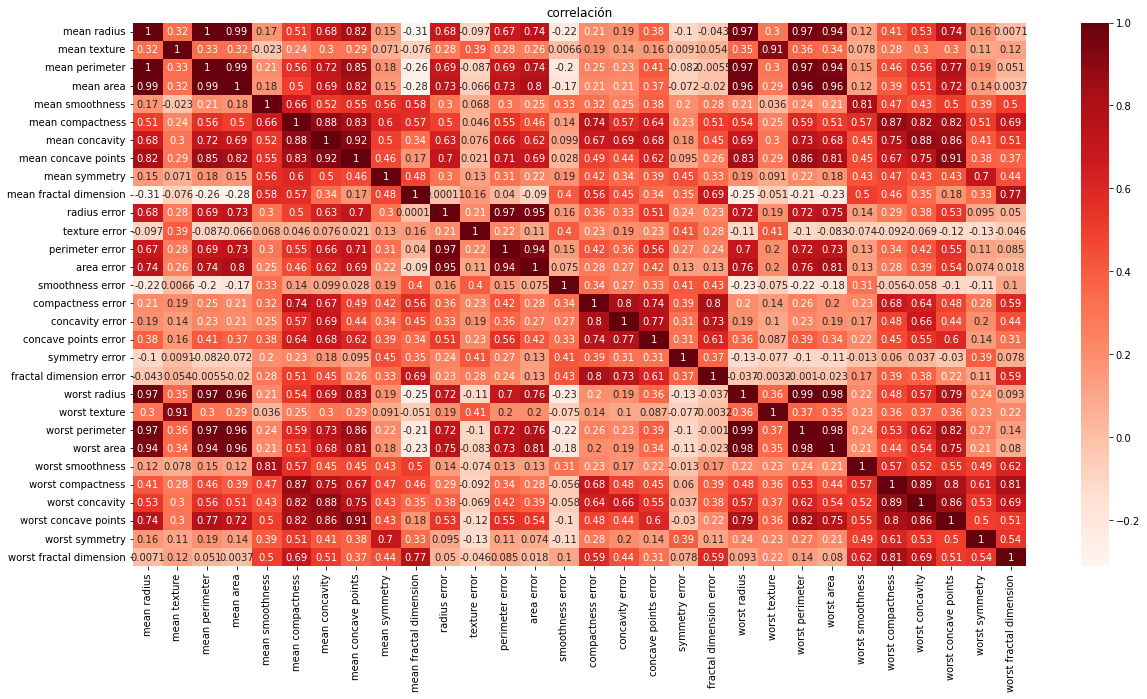

In [10]:
corr=x_df.corr()
fig=plt.subplots(1,figsize=(20,10))
heatmap=sns.heatmap(corr,annot=True,cmap='Reds')
plt.title('correlación')
plt.show()

### PCA

* Como hemos podido ver, disponemos de un dataset con un elevado número de columnas y pocos registros, lo que puede llevar a un problema de sobre-ajuste del futuro modelo. 
* A continuación vamos a probar a reducir el número de variables mediante un PCA, en primer lugar vamos a realizar este análisis con todas la variables para ver cuánta varianza explica cada componente y veremos si es posible realizar esta transformación

In [14]:
pca=PCA(n_components=30)
pca.fit(x_df)
df_pca=pca.transform(x_df)

Text(0, 0.5, 'Var explicada')

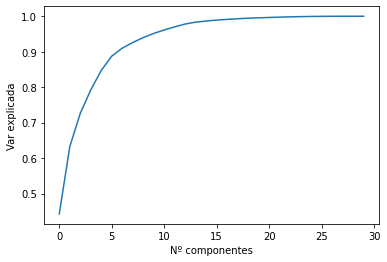

In [15]:
var_expl=pca.explained_variance_ratio_
plt.plot(np.cumsum(var_expl))
plt.xlabel('Nº componentes')
plt.ylabel('Var explicada')

* Como podemos observar, a partir de la componente 15 más o menos la varianza explicada llega a ser la total, por lo que podemos realizar la transformación quedándonos con la mitad de los campos del dataset original

In [16]:
pca=PCA(n_components=15)
pca.fit(x_df)
df_pca=pca.transform(x_df)

Text(0, 0.5, 'Var explicada')

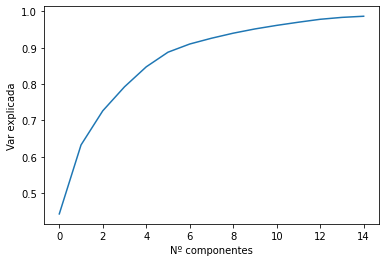

In [17]:
var_expl=pca.explained_variance_ratio_
plt.plot(np.cumsum(var_expl))
plt.xlabel('Nº componentes')
plt.ylabel('Var explicada')

### Modelo

* El siguiente paso consiste en realizar la partición de los datos en conjunto de entrenamiento y test, además de esto vamos a dividir el conjunto de entrenamiento en otros dos conjuntos para hacer una prueba sobre qué hiperparámetros de los modelos que estamos considerando utilizar son los más adecuados
* Los modelos que vamos a considerar aplicar son la regresión logística y la máquina de vectores soporte

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_df,y,test_size=0.2,stratify=y,random_state=42)
x_t,x_v,y_t,y_v=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train,random_state=42)

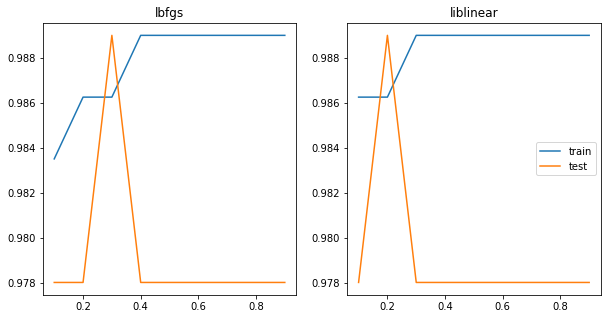

In [19]:
estimadores=np.arange(0.1,1,0.1)
criterio=['lbfgs','liblinear']

fig,ax=plt.subplots(1,2,figsize=(10,5))
c=0
for criterio in criterio:
    resultado_train=[]
    resultado_test=[]
    for i in estimadores:
        modelo=LogisticRegression(C=i,solver=criterio)
        modelo.fit(x_t,y_t)
        score_train=modelo.score(x_t,y_t)
        resultado_train.append(score_train)
        y_pred=modelo.predict(x_v)
        score_test=modelo.score(x_v,y_v)
        resultado_test.append(score_test)
    ax[c].plot(estimadores,resultado_train,label='train')
    ax[c].plot(estimadores,resultado_test,label='test')
    ax[c].set_title(criterio)
    c+=1
plt.legend()
plt.show()
        

* En el caso de la regresión logística los gráficos parecen bastante similares, vamos a utilizar un criterio 'liblinear' que es el recomendado para datasets pequeños con un C de 0.2

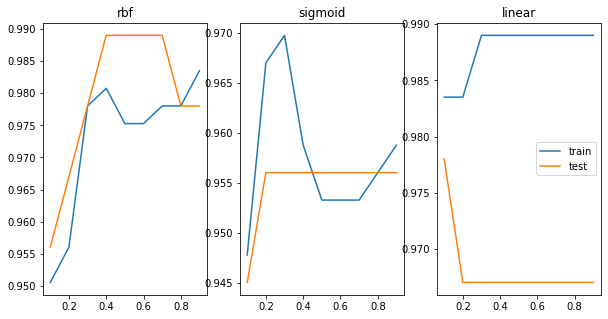

In [20]:
estimadores=np.arange(0.1,1,0.1)
criterio=['rbf','sigmoid','linear']

fig,ax=plt.subplots(1,3,figsize=(10,5))
c=0
for criterio in criterio:
    resultado_train=[]
    resultado_test=[]
    for i in estimadores:
        modelo=SVC(C=i,kernel=criterio)
        modelo.fit(x_t,y_t)
        score_train=modelo.score(x_t,y_t)
        resultado_train.append(score_train)
        y_pred=modelo.predict(x_v)
        score_test=modelo.score(x_v,y_v)
        resultado_test.append(score_test)
    ax[c].plot(estimadores,resultado_train,label='train')
    ax[c].plot(estimadores,resultado_test,label='test')
    ax[c].set_title(criterio)
    c+=1
plt.legend()
plt.show()

* En el caso de SVC vemos por los gráficos que con un kernel 'rbf' y un C de 0.4 se obtienen los mejores resultados, luego serán los hiperparámetros que aplicaremos a nuestro modelo

In [21]:
svc=SVC(C=0.4,kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)

0.9802197802197802

In [22]:
y_pred=svc.predict(x_test)
svc.score(x_test,y_test)

0.9736842105263158

In [23]:
clases=df.target_names

In [24]:
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(cm,columns=clases,index=clases)
cm_df

,malignant,benign
malignant,40,2
benign,1,71


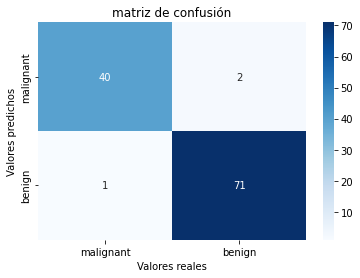

In [25]:
sns.heatmap(cm_df,annot=True,cmap='Blues')
plt.title('matriz de confusión')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.show()

In [36]:
macro_svc=precision_recall_fscore_support(y_test,y_pred,average='macro')
micro_svc=precision_recall_fscore_support(y_test,y_pred,average='micro')
weighted_svc=precision_recall_fscore_support(y_test,y_pred,average='weighted')

In [27]:
svc_metric=pd.DataFrame({'macro':macro_svc,'micro':macro_svc,'weighted':macro_svc},index=['precision','recall','fscore','support'])
svc_metric=svc_metric.drop('support',axis=0)
svc_metric

,macro,micro,weighted
precision,0.974106,0.974106,0.974106
recall,0.969246,0.969246,0.969246
fscore,0.971583,0.971583,0.971583


* En el caso del SVC vemos como obtenemos unas métricas muy buenas
* En la matriz de confusión vemos pocos falsos positivos y negativos

In [28]:
lr=LogisticRegression(C=0.2,solver='liblinear')
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.9868131868131869

In [29]:
y_pred=lr.predict(x_test)
lr.score(x_test,y_test)

0.9824561403508771

In [30]:
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(cm,columns=clases,index=clases)
cm_df

,malignant,benign
malignant,41,1
benign,1,71


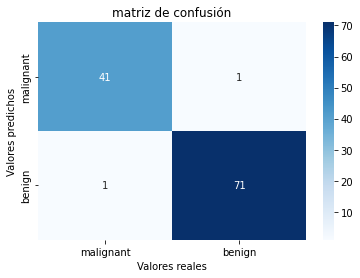

In [31]:
sns.heatmap(cm_df,annot=True,cmap='Blues')
plt.title('matriz de confusión')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.show()

In [32]:
macro_lr=precision_recall_fscore_support(y_test,y_pred,average='macro')
micro_lr=precision_recall_fscore_support(y_test,y_pred,average='micro')
weighted_lr=precision_recall_fscore_support(y_test,y_pred,average='weighted')

In [33]:
lr_metric=pd.DataFrame({'macro':macro_lr,'micro':macro_lr,'weighted':macro_lr},index=['precision','recall','fscore','support'])
lr_metric=lr_metric.drop('support',axis=0)
lr_metric

,macro,micro,weighted
precision,0.981151,0.981151,0.981151
recall,0.981151,0.981151,0.981151
fscore,0.981151,0.981151,0.981151


* En el caso de la regresión logística los resultados también son bastante buenos

### Conclusiones

* En este ejercicio nos hemos enfrentado a un problema de aprendizaje supervisado donde hemos querido probar el funcionamiento de dos modelos. El dataset utilizado ya estaba bastante bien organizado lo que nos a ahorrado pasos como el preprocesamiento y seguramente también estaba preparado para obtener unas métricas finales bastante buenas en comparación con lo que se podría obtener en un problema real.
* Durante el ejercicio hemos llevado a cabo técnicas de visualización de la información y algún tratamiento de los datos como la normalización y el análisis de componentes principales.
* Por último hemos pasado a definir los modelos que consideramos más adecuados y a probarlos para evaluar posteriormente los resultados obtenidos